In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn import svm

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

In [5]:
from sklearn.model_selection import GridSearchCV

0 -> no heart disease
1 -> heart disease

Data Collection and Preprocessing

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.shape

(1025, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Splitting features and target

In [13]:
 x = df.drop(columns='target', axis=1)
 y = df['target']

In [14]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [15]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


#Splitting train and test data

In [16]:
X_train, X_test , Y_train, Y_test = train_test_split(x,y,test_size= 0.4, random_state=4, stratify=y)

In [17]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(615, 13) (410, 13) (615,) (410,)


Model Training

In [18]:
#list of models
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [19]:
def compare_models():
  for model in models:
    model.fit(X_train,Y_train)
    predict = model.predict(X_test)
    accuracy = accuracy_score(predict,Y_test)
    print('Accuracy score of model', model, 'is',accuracy)




In [20]:
compare_models()

Accuracy score of model LogisticRegression(max_iter=1000) is 0.8341463414634146
Accuracy score of model SVC(kernel='linear') is 0.8170731707317073
Accuracy score of model KNeighborsClassifier() is 0.7024390243902439
Accuracy score of model RandomForestClassifier() is 1.0


In [21]:
regressor = LogisticRegression()

In [22]:
#Training logisticregression with training data
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [23]:
#Accuracy on training data
X_train_predict = regressor.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)

In [24]:
print(training_data_accuracy)

0.8617886178861789


In [25]:
#Accuracy on test data
X_test_predict = regressor.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)

In [26]:
print(test_data_accuracy)

0.8317073170731707


**Precision**

In [48]:
from sklearn.metrics import precision_score

In [49]:
#presion for training data
precision_score(X_train_predict, Y_train)

0.9145569620253164

In [52]:
precision_score(X_test_predict, Y_test)

0.919047619047619

**Recall**

In [50]:
from sklearn.metrics import recall_score
recall_score(X_train_predict, Y_train)

0.8328530259365994

In [53]:
recall_score(X_test_predict, Y_test)

0.7877551020408163

**F1** **score**

In [51]:
from sklearn.metrics import f1_score
f1_score(X_train_predict, Y_train)

0.8717948717948717

In [54]:
f1_score(X_test_predict, Y_test)

0.8483516483516483

Function

In [55]:
def precision_recall_f1_score(pred_labels, true_labels):
  precision_value = precision_score(pred_labels, true_labels)
  recall_value = recall_score(pred_labels, true_labels)
  f1_value = f1_score(pred_labels, true_labels)
  print('Precision :', precision_value)
  print('Recall :', recall_value)
  print('F1 :', f1_value)


In [58]:
precision_recall_f1_score(X_train_predict, Y_train)

Precision : 0.9145569620253164
Recall : 0.8328530259365994
F1 : 0.8717948717948717


In [59]:
precision_recall_f1_score(X_test_predict, Y_test)

Precision : 0.919047619047619
Recall : 0.7877551020408163
F1 : 0.8483516483516483


# **Confusion Matrix**

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cf_matrix= confusion_matrix(Y_test,X_test_predict)
print(cf_matrix)

[[148  52]
 [ 17 193]]


In [29]:
tn,fp,fn,tp = confusion_matrix(Y_test,X_test_predict).ravel()
print(tn,fp,fn,tp)

148 52 17 193


<Axes: >

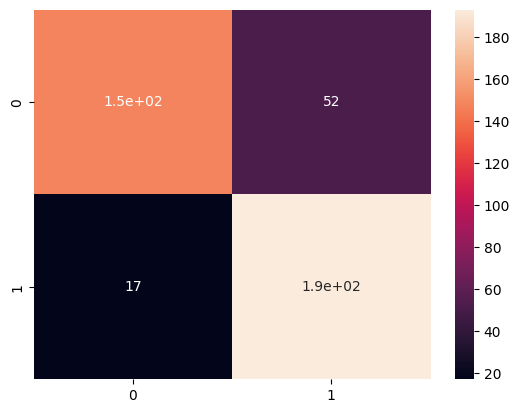

In [30]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Building Predictive System

In [31]:
input_data = (61,1,0,148,203,0,1,161,0,0.0,2,1,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshape)
print(prediction)
if (prediction == 0):
  print('The person does not have a heart disease')
else:
  print('The person has a heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Cross Validation

In [32]:
cv_score = cross_val_score(LogisticRegression(max_iter=1000),x,y,cv=5)

In [33]:
print(cv_score)

[0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]


In [34]:
mean_accuracy = sum(cv_score)/len(cv_score)
mean_accuracy = mean_accuracy*100
mean_accuracy = round(mean_accuracy,2)
print(mean_accuracy)

84.98


Support Vector Classifier

In [35]:
 cv_score = cross_val_score(SVC(kernel='linear'),x,y,cv=5)

In [36]:
print(cv_score)

[0.88292683 0.86829268 0.84390244 0.81463415 0.80487805]


In [37]:
mean_accuracy = sum(cv_score)/len(cv_score)
mean_accuracy = mean_accuracy*100
mean_accuracy = round(mean_accuracy,2)
print(mean_accuracy)

84.29


Creating function to compare model

In [38]:
#list of models
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [39]:
def compare_model_cross_validation():

  for model in models:
    cv_score = cross_val_score(model,x,y,cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy,2)
    print('Cross validation accuracies for',model,'is',cv_score)
    print('Accuracy % of the',model,mean_accuracy)
    print('...................................................')


In [40]:
compare_model_cross_validation()

Cross validation accuracies for LogisticRegression(max_iter=1000) is [0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]
Accuracy % of the LogisticRegression(max_iter=1000) 84.98
...................................................
Cross validation accuracies for SVC(kernel='linear') is [0.88292683 0.86829268 0.84390244 0.81463415 0.80487805]
Accuracy % of the SVC(kernel='linear') 84.29
...................................................
Cross validation accuracies for KNeighborsClassifier() is [0.76585366 0.74634146 0.76097561 0.71219512 0.75121951]
Accuracy % of the KNeighborsClassifier() 74.73
...................................................
Cross validation accuracies for RandomForestClassifier() is [1.         1.         1.         1.         0.98536585]
Accuracy % of the RandomForestClassifier() 99.71
...................................................


Random Forest Classifier has highest accuracy value with default hyperparameter values

Comparing models with different hyperparameters using GridCV

In [41]:
model_list = [LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

In [42]:
parameters = {
    'log_reg_hyperparameters':{
        'C':[1,5,10,20]
    },
    'svc_hyperparameters':{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C': [1,5,10,20]
    },
    'KNN_hyperparameters':{
        'n_neighbors':[3,5,10]
    },
    'random_forest_hyperparameters':{
        'n_estimators':[10,20,50,100]
    }
}


In [43]:
model_keys = list(parameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [44]:
model_keys[0]

'log_reg_hyperparameters'

In [45]:
parameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

In [46]:
def model_selection(list_of_models, hyperparameters_dictionary):
  result = []
  i=0
  for model in model_list:
    key = model_keys[i]
    params = hyperparameters_dictionary[key]
    i+=1
    print(model)
    print(params)

    classifier = GridSearchCV(model,params,cv=5)

    classifier.fit(x,y)
    result.append({
        'model_used':model,
        'highest_score':classifier.best_score_,
        'best_hyperparameters':classifier.best_params_
    })
    result_dataframe = pd.DataFrame(result,columns=['model_used','highest_score','best_hyperparameters'])
  return result_dataframe




In [47]:
model_selection(model_list, parameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
RandomForestClassifier()
{'n_estimators': [10, 20, 50, 100]}


,model_used,highest_score,best_hyperparameters
0,LogisticRegression(max_iter=1000),0.849756,{'C': 1}
1,SVC(),0.844878,"{'C': 5, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.890732,{'n_neighbors': 3}
3,RandomForestClassifier(),0.997073,{'n_estimators': 50}


RandomForestClassifier with n_estimator : 20 has highest accuracy